# Data Analysis and Statistical Testing for Research Tools

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare , poisson

## Excercise 1 : Confidence Interval & χ² Test

In [108]:
np.random.seed(0)
random_numbers = np.random.exponential(scale=3, size=2000) * 10

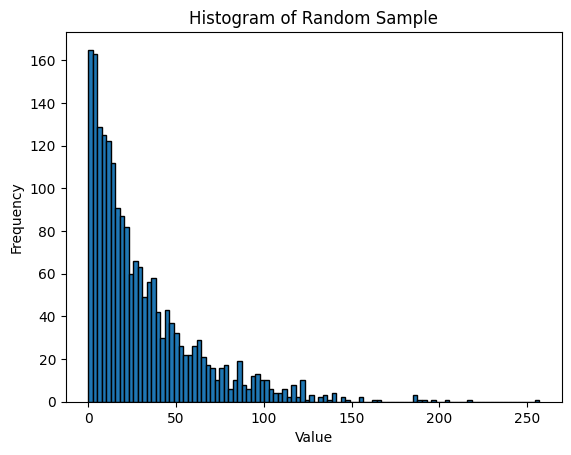

In [110]:
# Plot the histogram of the sample
plt.hist(random_numbers, bins=100, edgecolor='black')
plt.title("Histogram of Random Sample")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [111]:
# Step 2: Calculate the mean (mu) of the sample
mu = np.mean(random_numbers)

# Step 3: Calculate the standard deviation (std) of the sample
std = np.std(random_numbers)

# Step 4: Calculate the standard deviation of the sample mean (sigma_mean)
N = 2000  # Sample size
sigma_mean = std / np.sqrt(N)

print(f"Mean (mu): {mu}")
print(f"Standard Deviation (std): {std}")
print(f"Sigma: {sigma_mean}")

Mean (mu): 31.043868550255937
Standard Deviation (std): 31.452067191826433
Sigma: 0.7032896027381482


In [112]:
# Define significance level
alpha = 0.1

In [113]:
# Calculate the confidence interval
lower_bound = mu + norm.ppf(alpha/2) * sigma_mean
upper_bound = mu + norm.ppf(1-alpha/2) * sigma_mean

# Output the results
print(f"Confidence Interval: [{lower_bound}, {upper_bound}]")

Confidence Interval: [29.887060096394833, 32.20067700411704]


### Chi-square Test


In [116]:
def perform_chi_squared_test(data, distribution_type):
    observed_freq, bins = np.histogram(data, bins='auto')

    if distribution_type == 'normal':
        mu = np.mean(data)
        sigma = np.std(data)
        expected_freq = []
        for i in range(len(bins) - 1):
            lower = bins[i]
            upper = bins[i + 1]
            prob = norm.cdf(upper, loc=mu, scale=sigma) - norm.cdf(lower, loc=mu, scale=sigma)
            expected_freq.append(prob * len(data))
    elif distribution_type == 'poisson':
        lambda_poisson = np.mean(data)
        expected_freq = []
        for i in range(len(bins) - 1):
            lower = bins[i]
            upper = bins[i + 1]
            prob = poisson.cdf(upper, mu=lambda_poisson) - poisson.cdf(lower, mu=lambda_poisson)
            expected_freq.append(prob * len(data))
    else:
        print("Unsupported distribution type.")
        return

    expected_freq = np.array(expected_freq)
    valid_bins = expected_freq > 0
    observed_freq = observed_freq[valid_bins]
    expected_freq = expected_freq[valid_bins]
    expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

    chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value}")

    if p_value < 0.1:
        print(f"Reject the null hypothesis: Data does not follow the {distribution_type} distribution.")
    else:
        print(f"Fail to reject the null hypothesis: Data follows the {distribution_type} distribution.")

In [123]:
print("Choose the distribution type for the Chi-squared test:")
print("1. Normal distribution")
print("2. Poisson distribution")
choice = input("Enter the number corresponding to your choice: ")

if choice == '1':
  np.random.seed(0)
  random_numbers = np.random.exponential(scale=3, size=2000) * 10
  #random_numbers = np.random.normal(scale=3, size=2000) * 10
  perform_chi_squared_test(random_numbers, 'normal')
elif choice == '2':
  np.random.seed(0)
  random_numbers = np.random.exponential(scale=3, size=2000) * 10
  #random_numbers = np.random.poisson(lam=3, size=2000)
  perform_chi_squared_test(random_numbers, 'poisson')
else:
  print("Invalid choice.")

Choose the distribution type for the Chi-squared test:
1. Normal distribution
2. Poisson distribution
Enter the number corresponding to your choice: 2
Chi2 Statistic: 20074320181051.605, p-value: 0.0
Reject the null hypothesis: Data does not follow the poisson distribution.


## Exercise 2: U Mann-Whitney test , Wilcoxon test

In [126]:
from scipy.stats import mannwhitneyu , wilcoxon

sample1 = np.array([371, 352, 397, 378, 347, 366, 387, 366, 378, 359, 361, 382])
sample2 = np.array([409, 382, 361, 394, 361, 382, 387, 359, 397, 359, 373, 382])
alpha = 0.1  # Significance level

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sample1, sample2)

print(f"U Statistic: {stat}")
print(f"P-Value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The samples come from different populations.")
else:
    print("Fail to reject the null hypothesis: The samples come from the same population.")

# Perform the Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(sample1, sample2)

print(f"Wilcoxon Statistic: {stat}")
print(f"P-Value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The samples come from different populations.")
else:
    print("Fail to reject the null hypothesis: The samples come from the same population.")

U Statistic: 51.5
P-Value: 0.24594176200937112
Fail to reject the null hypothesis: The samples come from the same population.
Wilcoxon Statistic: 9.0
P-Value: 0.10943302203680204
Fail to reject the null hypothesis: The samples come from the same population.


## Excercise 3 : ANOVA

In [127]:
from scipy.stats import f_oneway

sample_A = np.array([643, 655, 702, 682, 647, 638, 697])
sample_B = np.array([469, 427, 525, 489, 452, 510])
sample_C = np.array([484, 456, 402, 431, 493])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(sample_A, sample_B, sample_C)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The samples are not independent (at least one sample mean is different).")
else:
    print("Fail to reject the null hypothesis: The samples are independent (no significant difference between sample means).")


F-statistic: 77.15453575349866
P-value: 1.2752130033984078e-08
Reject the null hypothesis: The samples are not independent (at least one sample mean is different).


## Excercise 4: Linear regression

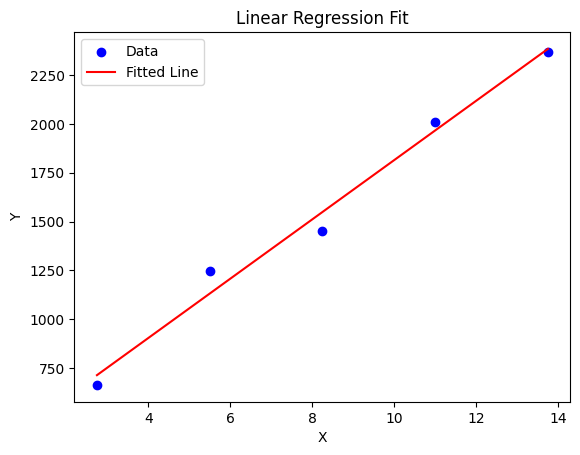

Slope: 151.96363636363637
Intercept: 295.0999999999999
R-squared: 0.984654724392046
P-value: 0.0008105170416138438
Standard Error: 10.952781198305775


In [129]:
from scipy.stats import linregress

X = np.array([2.75, 5.50, 8.25, 11.00, 13.75])
Y = np.array([663, 1247, 1453, 2010, 2371])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calculate the fitted line
Y_fit = slope * X + intercept
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_fit, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")